In [1]:
"""
This note book analyzes how density AND LID together relate to reconstruction loss.
"""

'\nThis note book analyzes how density AND LID together relate to reconstruction loss.\n'

In [2]:
import json
import os
import sys
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import numpy as np
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from data.utils.dataloaders import clean_ReconstructionDataset_Heuristic
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# read reconstruction loss json file 
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses/val_categorized/all_APG_on.json', 'r') as f:
    reconst_losses = json.load(f)
print(len(reconst_losses))

450000


In [4]:
k_values = [1,2,4,8,16,32,64,128,256]

best_lids = [26,26,25,25,24,24,23,14,14]
best_lids_per_k = {}
for best_lid, k in zip(best_lids, k_values):
    LID_JSON   = f"/BS/data_mani_compress/work/thesis/thesis/data/datasets/imageNet_LID_values/original_images/val/t_{best_lid}/lid_0000_3125.json"
    # Load LID values; we assume it's ordered so that index i corresponds to image i
    with open(LID_JSON, 'r') as f:
        lid_values = json.load(f)
    best_lids_per_k[k] = lid_values

print('Sizes:', {k: len(v) for k, v in best_lids_per_k.items()})

Sizes: {1: 50000, 2: 50000, 4: 50000, 8: 50000, 16: 50000, 32: 50000, 64: 50000, 128: 50000, 256: 50000}


In [5]:
# load densities
main_folder = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/list_version/val_density_div_list_reconst_"

density_dict = {}
for k in k_values:
    with open((main_folder + f"{k}/token_count/256_0000_0200.json"), 'r') as f:
        current_densities = json.load(f)
    density_dict[k]=current_densities

print(density_dict.keys(), len(density_dict[1]), len(density_dict[2]), len(density_dict[4]), len(density_dict[8]), len(density_dict[16]), len(density_dict[32]), len(density_dict[64]), len(density_dict[128]), len(density_dict[256]))

dict_keys([1, 2, 4, 8, 16, 32, 64, 128, 256]) 4000 4000 4000 4000 4000 4000 4000 4000 4000


In [6]:
processed_density_dict = {}
timestep_needed = [0,0,0,0,0,0,0,3,4]
for idx, (key, value) in enumerate(density_dict.items()):
    processed_density_dict[key] = [sum(v[0][timestep_needed[idx]:]) for v in value]

In [7]:
print(density_dict.keys(), len(density_dict[1]), len(density_dict[1][0][0]), (density_dict[1][0][1]))
print(processed_density_dict.keys(), len(processed_density_dict[1]), processed_density_dict[1][0], processed_density_dict[1][1])

dict_keys([1, 2, 4, 8, 16, 32, 64, 128, 256]) 4000 50 -35532.21875
dict_keys([1, 2, 4, 8, 16, 32, 64, 128, 256]) 4000 25703.694915771484 29421.284240722656


In [8]:
max_available = len(density_dict[1])  # max available

# Filter reconstruction entries to those that have available heuristics (density and LID)
filtered_reconst_losses = [
    rec for rec in reconst_losses
    if 'image_id' in rec and int(rec['image_id']) < max_available
]

ds = clean_ReconstructionDataset_Heuristic(
    reconstruction_data=filtered_reconst_losses,  # or your processed list of dicts
    local_density_information=processed_density_dict, # [l[0] for l in density]
    lid_information=best_lids_per_k,
    error_key=["LPIPS"],
)

In [9]:
print([item["k_value"] for item in ds])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [39]:
corr = []
for k in k_values:
    densities = []
    losses_lpips = []
    lids = []

    for data_point in ds:
        if data_point['k_value'] == k:
            densities.append(data_point['local_density'])
            losses_lpips.append(data_point['LPIPS'])
            lids.append(data_point['lid'])

    corr1 = np.corrcoef(densities, losses_lpips)[0, 1]
    corr.append(corr1)

In [10]:
r_lid = []
r_density = []
delta_lid_given_density = []
delta_density_given_lid = []
rmse_estimates = []
for k in k_values:
    densities = []
    losses_lpips = []
    lids = []

    for data_point in ds:
        if data_point['k_value'] == k:
            densities.append(data_point['local_density'])
            losses_lpips.append(data_point['LPIPS'])
            lids.append(data_point['lid'])

    X_density = np.array(densities).reshape(-1, 1)
    X_lid = np.array(lids).reshape(-1, 1)
    X_both = np.stack([densities, lids], axis=1)
    y = np.array(losses_lpips)

    # density only
    r2_density = LinearRegression().fit(X_density, y).score(X_density, y)
    r_density.append(r2_density)

    # lid only
    r2_lid = LinearRegression().fit(X_lid, y).score(X_lid, y)
    r_lid.append(r2_lid)

    # both
    r2_both = LinearRegression().fit(X_both, y).score(X_both, y)

    delta_r2_lid_given_density = r2_both - r2_density
    delta_r2_density_given_lid = r2_both - r2_lid
    delta_lid_given_density.append(delta_r2_lid_given_density)
    delta_density_given_lid.append(delta_r2_density_given_lid)
    
    lpips_std = np.std(y, ddof=1)   # sample std
    rmse_est = np.sqrt(1.0 - r2_both) * lpips_std
    rmse_estimates.append(rmse_est)

    print("\n\nK value:", k)
    print("R2 Density only:", f"{r2_density:.4f}")
    print("R2 LID only:", f"{r2_lid:.4f}")
    print("R2 Both:", f"{r2_both:.4f}")
    print("Delta R2 LID given Density:", f"{delta_r2_lid_given_density:.4f}")
    print("Delta R2 Density given LID:", f"{delta_r2_density_given_lid:.4f}")
    print(f"k={k} | LPIPS std: {lpips_std:.4f} | approx RMSE: {rmse_est:.4f}")




K value: 1
R2 Density only: 0.0184
R2 LID only: 0.0067
R2 Both: 0.0212
Delta R2 LID given Density: 0.0028
Delta R2 Density given LID: 0.0144
k=1 | LPIPS std: 0.0684 | approx RMSE: 0.0676


K value: 2
R2 Density only: 0.0595
R2 LID only: 0.0253
R2 Both: 0.0676
Delta R2 LID given Density: 0.0082
Delta R2 Density given LID: 0.0423
k=2 | LPIPS std: 0.0689 | approx RMSE: 0.0666


K value: 4
R2 Density only: 0.2885
R2 LID only: 0.1079
R2 Both: 0.2959
Delta R2 LID given Density: 0.0074
Delta R2 Density given LID: 0.1881
k=4 | LPIPS std: 0.0718 | approx RMSE: 0.0603


K value: 8
R2 Density only: 0.3733
R2 LID only: 0.1815
R2 Both: 0.4015
Delta R2 LID given Density: 0.0282
Delta R2 Density given LID: 0.2200
k=8 | LPIPS std: 0.0738 | approx RMSE: 0.0571


K value: 16
R2 Density only: 0.4710
R2 LID only: 0.2386
R2 Both: 0.4976
Delta R2 LID given Density: 0.0266
Delta R2 Density given LID: 0.2590
k=16 | LPIPS std: 0.0783 | approx RMSE: 0.0555


K value: 32
R2 Density only: 0.5498
R2 LID only: 0.

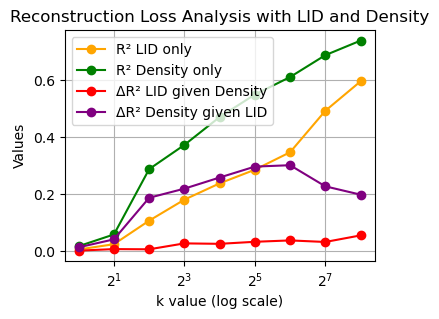

In [18]:
# plot rmse, r_lid, r_density, delta_lid_given_density, delta_density_given_lid
plt.figure(figsize=(4,3))
plt.plot(k_values, r_lid, marker='o', label='R² LID only', color='orange')
plt.plot(k_values, r_density, marker='o', label='R² Density only', color='green')
plt.plot(k_values, delta_lid_given_density, marker='o', label='ΔR² LID given Density', color='red')
plt.plot(k_values, delta_density_given_lid, marker='o', label='ΔR² Density given LID', color='purple')
plt.xscale('log', base=2)
plt.xlabel('k value (log scale)')
plt.ylabel('Values')
plt.title('Reconstruction Loss Analysis with LID and Density')
plt.legend()
plt.grid(True)
plt.show()

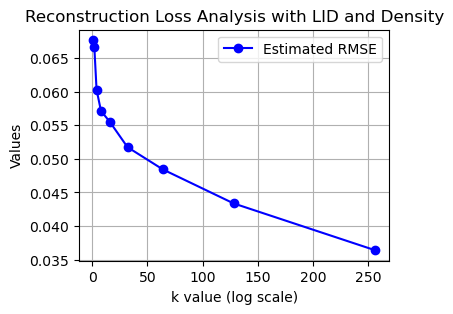

In [17]:
# plot rmse, r_lid, r_density, delta_lid_given_density, delta_density_given_lid
plt.figure(figsize=(4, 3))
plt.plot(k_values, rmse_estimates, marker='o', label='Estimated RMSE', color='blue')
#plt.xscale('log', base=2)
plt.xlabel('k value (log scale)')
plt.ylabel('Values')
plt.title('Reconstruction Loss Analysis with LID and Density')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
for k in k_values:
    densities = []
    lids = []
    losses_lpips = []

    for data_point in ds:
        if data_point["k_value"] == k:
            densities.append(data_point["local_density"])
            lids.append(data_point["lid"])
            losses_lpips.append(data_point["LPIPS"])

    if len(densities) < 5:
        continue

    X = np.stack([densities, lids], axis=1)  # [N, 2]
    y = np.array(losses_lpips)               # [N]

    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)

    y_pred = model.predict(X)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae  = mean_absolute_error(y, y_pred)
    r2   = model.score(X, y)

    print(
        f"k={k:>3} | "
        f"R²={r2:.3f} | "
        f"RMSE={rmse:.4f} | "
        f"MAE={mae:.4f}"
    )


k=  1 | R²=0.021 | RMSE=0.0676 | MAE=0.0519
k=  2 | R²=0.068 | RMSE=0.0666 | MAE=0.0510
k=  4 | R²=0.296 | RMSE=0.0603 | MAE=0.0459
k=  8 | R²=0.401 | RMSE=0.0571 | MAE=0.0441
k= 16 | R²=0.498 | RMSE=0.0555 | MAE=0.0429
k= 32 | R²=0.584 | RMSE=0.0517 | MAE=0.0398
k= 64 | R²=0.650 | RMSE=0.0484 | MAE=0.0373
k=128 | R²=0.721 | RMSE=0.0434 | MAE=0.0332
k=256 | R²=0.795 | RMSE=0.0364 | MAE=0.0278


In [ ]:
"""
A single model predicting log(k) from LPIPS, density, and LID.
"""

# collect all data
lpips = []
densities = []
lids = []
ks = []

for data_point in ds:
    lpips.append(data_point["LPIPS"])
    densities.append(data_point["local_density"])
    lids.append(data_point["lid"])
    ks.append(data_point["k_value"])

X = np.stack([lpips, densities, lids], axis=1)  # [N, 3]
y = np.log(np.array(ks))                        # predict log(k)

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# predictions
y_pred = model.predict(X)
k_pred = np.exp(y_pred)

# errors
rmse_logk = np.sqrt(mean_squared_error(y, y_pred))
mae_logk  = mean_absolute_error(y, y_pred)

rmse_k = np.sqrt(mean_squared_error(ks, k_pred))
mae_k  = mean_absolute_error(ks, k_pred)

print("Model:")
print(f"log k ≈ {model.coef_[0]:.4f}·LPIPS "
      f"+ {model.coef_[1]:.4f}·density "
      f"+ {model.coef_[2]:.4f}·LID "
      f"+ {model.intercept_:.4f}")

print(f"RMSE (log k): {rmse_logk:.4f}")
print(f"MAE  (log k): {mae_logk:.4f}")
print(f"RMSE (k): {rmse_k:.2f}")
print(f"MAE  (k): {mae_k:.2f}")


Model:
log k ≈ -11.5343·LPIPS + -0.0001·density + 0.0000·LID + 12.5104
RMSE (log k): 0.8659
MAE  (log k): 0.6955
RMSE (k): 85.69
MAE  (k): 31.00


In [ ]:
"""Fit separate models per k value to predict LPIPS from density and LID."""

models = {}   # k -> fitted model

for k in k_values:
    densities = []
    lids = []
    losses = []

    for dp in ds:
        if dp["k_value"] == k:
            densities.append(dp["local_density"])
            lids.append(dp["lid"])
            losses.append(dp["LPIPS"])

    if len(densities) < 5:
        continue

    X = np.stack([densities, lids], axis=1)
    y = np.array(losses)

    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)

    models[k] = model

In [ ]:
def predict_k_from_loss(lpips, density, lid, models):
    """
    Predict k based on which model gives the closest LPIPS prediction
    """
    best_k = None
    best_error = float("inf")
    best_pred_lpips = None

    for k, model in models.items():
        pred_lpips = model.predict([[density, lid]])[0]
        error = abs(pred_lpips - lpips)

        if error < best_error:
            best_error = error
            best_k = k
            best_pred_lpips = pred_lpips

    return best_k, best_pred_lpips, best_error


In [ ]:
k_vals = np.array([1,2,4,8,16,32,64,128,256])
lpips_means = np.array([
    0.6641367216134071,
    0.6390045218294859,
    0.5810772976367176,
    0.5412031808558107,
    0.5040336578929424,
    0.4624336672103405,
    0.4260499442347512,
    0.37830494250804186,
    0.324529645893015
])
logk = np.log2(k_vals)

lpips_slope = np.abs(np.gradient(lpips_means, logk))
lpips_weight = lpips_slope / lpips_slope.max()

In [35]:

k_values = np.array([1,2,4,8,16,32,64,128,256], dtype=float)
k_to_idx = {int(k): i for i, k in enumerate(k_values)}  # maps k -> index 0..8

lpips_errors = []
k_abs_errors = []
k_idx_errors = []          # error in "doubling steps" (log2 units)
weighted_step_errors = []
within_1_step = 0
within_2_steps = 0
correct = 0
total = 0

for dp in ds:
    true_k = int(dp["k_value"])
    lpips = dp["LPIPS"]
    density = dp["local_density"]
    lid = dp["lid"]

    if true_k not in models:
        continue

    k_hat, pred_lpips, lpips_err = predict_k_from_loss(
        lpips=lpips, density=density, lid=lid, models=models
    )

    k_hat = int(k_hat)

    # LPIPS error (already absolute)
    lpips_errors.append(lpips_err)

    # Raw k absolute error (can look big because k is log-spaced)
    k_abs_errors.append(abs(k_hat - true_k))

    # "Step" error: how many doublings off (|log2(k_hat) - log2(true_k)|)
    true_idx = k_to_idx[true_k]
    pred_idx = k_to_idx[k_hat]
    step_err = abs(pred_idx - true_idx)
    k_idx_errors.append(step_err)
    w = lpips_weight[true_idx]

    weighted_step_errors.append(step_err * w)

    # Within-neighborhood accuracies
    if step_err == 0:
        correct += 1
    if step_err <= 1:
        within_1_step += 1
    if step_err <= 2:
        within_2_steps += 1

    total += 1


In [37]:
# Aggregate metrics
lpips_mae  = float(np.mean(lpips_errors))
lpips_rmse = float(np.sqrt(np.mean(np.square(lpips_errors))))

k_mae_raw  = float(np.mean(k_abs_errors))
k_rmse_raw = float(np.sqrt(np.mean(np.square(k_abs_errors))))

# The key metrics for log-spaced k:
step_mae   = float(np.mean(k_idx_errors))                  # average #doublings off
acc_exact  = correct / total
acc_1step  = within_1_step / total
acc_2step  = within_2_steps / total

print("Evaluation (better for log-spaced k):")
print(f"LPIPS MAE:                {lpips_mae:.4f}")
print(f"k MAE:                    {k_mae_raw:.2f}")
print(f"Step MAE:                 {step_mae:.3f}")
print(f"Accuracy exact:           {acc_exact*100:.2f}%")
print(f"Accuracy within ±1 step:  {acc_1step*100:.2f}%   (neighbor ok)")
print(f"Accuracy within ±2 steps: {acc_2step*100:.2f}%")
print(f"Weighted step MAE:        {np.mean(weighted_step_errors):.2f}")


Evaluation (better for log-spaced k):
LPIPS MAE:                0.0173
k MAE:                    22.89
Step MAE:                 1.104
Accuracy exact:           36.54%
Accuracy within ±1 step:  70.96%   (neighbor ok)
Accuracy within ±2 steps: 87.86%
Weighted step MAE:        0.86


In [38]:
within_1_step_weighted = 0
within_2_steps_weighted = 0

for dp in ds:
    true_k = int(dp["k_value"])
    lpips = dp["LPIPS"]
    density = dp["local_density"]
    lid = dp["lid"]

    if true_k not in models:
        continue

    k_hat, pred_lpips, lpips_err = predict_k_from_loss(
        lpips=lpips, density=density, lid=lid, models=models
    )

    k_hat = int(k_hat)

    # indices
    true_idx = k_to_idx[true_k]
    pred_idx = k_to_idx[k_hat]

    # step error
    step_err = abs(pred_idx - true_idx)

    # weight at this k
    w = lpips_weight[true_idx]

    weighted_err = step_err * w

    # unweighted neighborhood (you already have)
    if step_err <= 1:
        within_1_step += 1
    if step_err <= 2:
        within_2_steps += 1

    # 🔥 weighted neighborhood (NEW)
    if weighted_err <= 1.0 * w:
        within_1_step_weighted += 1
    if weighted_err <= 2.0 * w:
        within_2_steps_weighted += 1

    total += 1


In [39]:
print("Accuracy (unweighted):")
print(f"Exact                : {100 * correct / total:.2f}%")
print(f"Within ±1 step       : {100 * within_1_step / total:.2f}%")
print(f"Within ±2 steps      : {100 * within_2_steps / total:.2f}%")

print("\nAccuracy (LPIPS-weighted):")
print(f"Within ±1 step (w)   : {100 * within_1_step_weighted / total:.2f}%")
print(f"Within ±2 steps (w)  : {100 * within_2_steps_weighted / total:.2f}%")


Accuracy (unweighted):
Exact                : 18.27%
Within ±1 step       : 70.96%
Within ±2 steps      : 87.86%

Accuracy (LPIPS-weighted):
Within ±1 step (w)   : 35.48%
Within ±2 steps (w)  : 43.93%


In [57]:
import numpy as np

# tolerance in LPIPS (you can sweep this later)
lpips_tol = 0.02
lpips_vals = np.array([item['LPIPS'] for item in reconst_losses])

num_bins = 10
quantiles = np.linspace(0, 1, num_bins + 1)
bin_edges = np.quantile(lpips_vals, quantiles)

# numerical safety
bin_edges[0] -= 1e-6
bin_edges[-1] += 1e-6
num_bins = len(bin_edges) - 1
bin_logk_lpips_only = [[] for _ in range(num_bins)]
bin_logk_lpips_struct = [[] for _ in range(num_bins)]

# ---------- LPIPS-only (baseline) ----------
for item in ds:
    lpips = item['LPIPS']
    k = item['k_value']

    bin_idx = np.searchsorted(bin_edges, lpips, side='right') - 1
    bin_idx = min(max(bin_idx, 0), num_bins - 1)

    bin_logk_lpips_only[bin_idx].append((k))

# ---------- LPIPS + density/LID ----------
for item in ds:
    lpips = item['LPIPS']
    density = item['local_density']
    lid = item['lid']

    bin_idx = np.searchsorted(bin_edges, lpips, side='right') - 1
    bin_idx = min(max(bin_idx, 0), num_bins - 1)

    plausible_logks = []

    for k, model in models.items():
        pred_lpips = model.predict([[density, lid]])[0]
        if abs(pred_lpips - lpips) <= lpips_tol:
            plausible_logks.append((k))

    if len(plausible_logks) > 0:
        bin_logk_lpips_struct[bin_idx].extend(plausible_logks)


In [ ]:
print("LPIPS-only vs LPIPS + (density, LID) ambiguity:\n")

for i in range(num_bins):
    lpips_range = f"[{bin_edges[i]:.3f}, {bin_edges[i+1]:.3f}]"

    logk_lpips = np.array(bin_logk_lpips_only[i])
    logk_struct = np.array(bin_logk_lpips_struct[i])

    if len(logk_lpips) == 0 or len(logk_struct) == 0:
        continue

    print(
        f"Bin {i:02d} | LPIPS {lpips_range} | "
        f"std (k) LPIPS-only = {logk_lpips.std(ddof=1):.2f} | "
        f"std (k) +struct = {logk_struct.std(ddof=1):.2f}"
    )

LPIPS-only vs LPIPS + (density, LID) ambiguity:

Bin 00 | LPIPS [0.021, 0.323] | std (k) LPIPS-only = 94.04 | std (k) +struct = 99.90
Bin 01 | LPIPS [0.323, 0.383] | std (k) LPIPS-only = 94.29 | std (k) +struct = 89.56
Bin 02 | LPIPS [0.383, 0.429] | std (k) LPIPS-only = 90.74 | std (k) +struct = 83.51
Bin 03 | LPIPS [0.429, 0.470] | std (k) LPIPS-only = 77.18 | std (k) +struct = 64.68
Bin 04 | LPIPS [0.470, 0.510] | std (k) LPIPS-only = 47.41 | std (k) +struct = 33.44
Bin 05 | LPIPS [0.510, 0.549] | std (k) LPIPS-only = 25.92 | std (k) +struct = 19.92
Bin 06 | LPIPS [0.549, 0.588] | std (k) LPIPS-only = 13.67 | std (k) +struct = 12.40
Bin 07 | LPIPS [0.588, 0.625] | std (k) LPIPS-only = 6.01 | std (k) +struct = 5.41
Bin 08 | LPIPS [0.625, 0.666] | std (k) LPIPS-only = 2.83 | std (k) +struct = 1.26
Bin 09 | LPIPS [0.666, 1.079] | std (k) LPIPS-only = 1.13 | std (k) +struct = 0.32


In [56]:
print("\nReduction in std log2(k) per LPIPS bin:\n")
for i in range(num_bins):
    ks = bin_logk_lpips_only[i]
    kss = bin_logk_lpips_struct[i]
    if len(ks) == 0 or len(kss) == 0:
        continue
    std_lpips_only = np.std(ks, ddof=1)
    std_lpips_struct = np.std(kss, ddof=1)
    delta_std = std_lpips_only - std_lpips_struct
    print(f"Bin {i:02d} | Δstd log2(k) = {delta_std:.2f}")


Reduction in std log2(k) per LPIPS bin:

Bin 00 | Δstd log2(k) = -0.33
Bin 01 | Δstd log2(k) = -0.01
Bin 02 | Δstd log2(k) = 0.07
Bin 03 | Δstd log2(k) = 0.25
Bin 04 | Δstd log2(k) = 0.33
Bin 05 | Δstd log2(k) = 0.29
Bin 06 | Δstd log2(k) = 0.29
Bin 07 | Δstd log2(k) = 0.28
Bin 08 | Δstd log2(k) = 0.29
Bin 09 | Δstd log2(k) = 0.36


In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]

print("Per-k: baseline (mean only) vs +density/LID linear model\n")

for k in k_values:
    densities = []
    lids = []
    y = []

    for dp in ds:
        if dp["k_value"] == k:
            densities.append(dp["local_density"])
            lids.append(dp["lid"])
            y.append(dp["LPIPS"])

    if len(y) < 5:
        continue

    y = np.array(y)

    # -------------------------
    # Baseline: predict mean(y)
    # -------------------------
    y_base = np.full_like(y, y.mean())
    rmse_base = np.sqrt(mean_squared_error(y, y_base))
    mae_base  = mean_absolute_error(y, y_base)

    # -------------------------
    # Model: linear regression
    # -------------------------
    X = np.stack([densities, lids], axis=1)
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)

    rmse_model = np.sqrt(mean_squared_error(y, y_pred))
    mae_model  = mean_absolute_error(y, y_pred)
    r2 = model.score(X, y)

    # Improvements
    d_rmse = rmse_base - rmse_model
    d_mae  = mae_base - mae_model
    pct_rmse = 100.0 * d_rmse / rmse_base if rmse_base > 1e-12 else 0.0
    pct_mae  = 100.0 * d_mae  / mae_base  if mae_base  > 1e-12 else 0.0

    print(
        f"k={k:<3} | "
        f"baseline RMSE={rmse_base:.4f}, MAE={mae_base:.4f} | "
        f"+struct RMSE={rmse_model:.4f}, MAE={mae_model:.4f}, R²={r2:.3f} | "
        f"ΔRMSE={d_rmse:.4f} ({pct_rmse:.1f}%), ΔMAE={d_mae:.4f} ({pct_mae:.1f}%)"
    )


Per-k: baseline (mean only) vs +density/LID linear model

k=1   | baseline RMSE=0.0684, MAE=0.0516 | +struct RMSE=0.0676, MAE=0.0519, R²=0.021 | ΔRMSE=0.0007 (1.1%), ΔMAE=-0.0002 (-0.5%)
k=2   | baseline RMSE=0.0689, MAE=0.0512 | +struct RMSE=0.0666, MAE=0.0510, R²=0.068 | ΔRMSE=0.0024 (3.4%), ΔMAE=0.0003 (0.5%)
k=4   | baseline RMSE=0.0718, MAE=0.0526 | +struct RMSE=0.0603, MAE=0.0459, R²=0.296 | ΔRMSE=0.0116 (16.1%), ΔMAE=0.0067 (12.7%)
k=8   | baseline RMSE=0.0738, MAE=0.0551 | +struct RMSE=0.0571, MAE=0.0441, R²=0.401 | ΔRMSE=0.0167 (22.6%), ΔMAE=0.0110 (20.0%)
k=16  | baseline RMSE=0.0783, MAE=0.0593 | +struct RMSE=0.0555, MAE=0.0429, R²=0.498 | ΔRMSE=0.0228 (29.1%), ΔMAE=0.0164 (27.6%)
k=32  | baseline RMSE=0.0802, MAE=0.0612 | +struct RMSE=0.0517, MAE=0.0398, R²=0.584 | ΔRMSE=0.0284 (35.5%), ΔMAE=0.0214 (34.9%)
k=64  | baseline RMSE=0.0818, MAE=0.0636 | +struct RMSE=0.0484, MAE=0.0373, R²=0.650 | ΔRMSE=0.0334 (40.8%), ΔMAE=0.0263 (41.4%)
k=128 | baseline RMSE=0.0821, MAE=0.0652 